In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sqlite3

In [19]:
bom = pd.read_csv('../data/bom.movie_gross.csv.gz')
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [35]:
bom['year'].value_counts().sort_index()

year
2010    328
2011    399
2012    400
2013    350
2014    395
2015    450
2016    436
2017    321
2018    308
Name: count, dtype: int64

# Rotten Tomatoes Data

In [20]:
rt_info = pd.read_csv('../data/rt.movie_info.tsv.gz', sep='\t')

# Converting the release dates to datetime objects
rt_info['theater_date'] = pd.to_datetime(rt_info['theater_date'])
rt_info['dvd_date'] = pd.to_datetime(rt_info['dvd_date'])

# creating a release_month column
rt_info['release_month'] = pd.to_datetime(rt_info['theater_date']).dt.month_name()

rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             1560 non-null   int64         
 1   synopsis       1498 non-null   object        
 2   rating         1557 non-null   object        
 3   genre          1552 non-null   object        
 4   director       1361 non-null   object        
 5   writer         1111 non-null   object        
 6   theater_date   1201 non-null   datetime64[ns]
 7   dvd_date       1201 non-null   datetime64[ns]
 8   currency       340 non-null    object        
 9   box_office     340 non-null    object        
 10  runtime        1530 non-null   object        
 11  studio         494 non-null    object        
 12  release_month  1201 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(10)
memory usage: 158.6+ KB


In [141]:
rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_month
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104 minutes,NaN,October
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,Entertainment One,August
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,NaN,NaN,116 minutes,NaN,September
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,NaN,NaN,128 minutes,NaN,December
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaT,NaN,NaN,200 minutes,NaN,NaN


In [21]:
rt_reviews = pd.read_csv('../data/rt.reviews.tsv.gz', sep='\t', encoding='latin-1')
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [152]:
# Combing the rt sheets into one df

rt_combined = pd.merge(rt_info, rt_reviews, on='id')
rt_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             54432 non-null  int64         
 1   synopsis       54300 non-null  object        
 2   rating_x       54346 non-null  object        
 3   genre          54345 non-null  object        
 4   director       48992 non-null  object        
 5   writer         45206 non-null  object        
 6   theater_date   53206 non-null  datetime64[ns]
 7   dvd_date       53206 non-null  datetime64[ns]
 8   currency       33310 non-null  object        
 9   box_office     33310 non-null  object        
 10  runtime        53594 non-null  object        
 11  studio         40125 non-null  object        
 12  release_month  53206 non-null  object        
 13  review         48869 non-null  object        
 14  rating_y       40915 non-null  object        
 15  fresh          5443

# TMDB Data

In [23]:
tmdb_movies = pd.read_csv('../data/tmdb.movies.csv.gz')
tmdb_movies.rename(columns={'title': 'primary_title'}, inplace=True)
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   primary_title      26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


# The Numbers Data

In [24]:
tn_movie_budgets = pd.read_csv('../data/tn.movie_budgets.csv.gz')
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [94]:
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])
tn_movie_budgets['release_month'] = pd.to_datetime(tn_movie_budgets['release_date']).dt.month_name()
tn_movie_budgets['release_year'] = pd.to_datetime(tn_movie_budgets['release_date']).dt.year

#tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$', '')
#tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace(',', '').astytpe(int) 

#tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$', '')
#tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace(',', '').astype(int)

tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   release_month      5782 non-null   object        
 7   release_year       5782 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(3)
memory usage: 338.9+ KB


In [99]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tn_movie_budgets['release_month'] = pd.Categorical(tn_movie_budgets['release_month'], categories=months, ordered=True)
tn_movie_budgets['release_month'].value_counts()

release_month
December     745
October      573
August       496
September    493
November     486
June         479
March        470
April        454
July         440
May          407
February     392
January      347
Name: count, dtype: int64

/var/folders/gf/gqtw2hsd3xx5_9tt2z47xflr0000gn/T/ipykernel_16187/1286484701.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tn_movie_budgets.groupby('release_month')['domestic_gross'].mean().sort_index(ascending=True).plot.bar()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

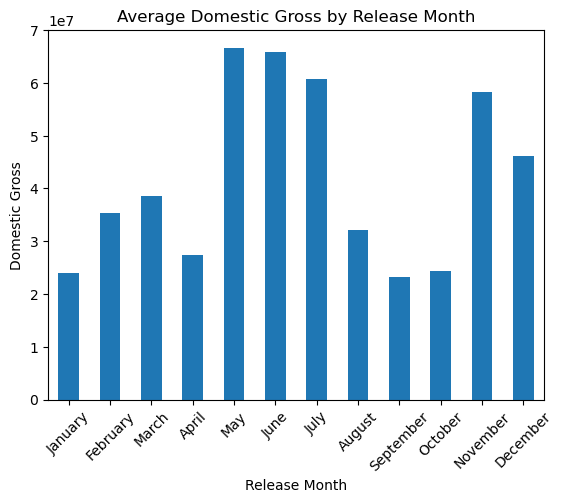

In [100]:

#tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$', '')
#tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace(',', '')


tn_movie_budgets.groupby('release_month')['domestic_gross'].mean().sort_index(ascending=True).plot.bar()



#ax = plt.bar(tn_movie_budgets['release_month'], tn_movie_budgets['domestic_gross'])

#months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#tn_movie_budgets['release_month'].value_counts().loc[months].plot.bar()

plt.title('Average Domestic Gross by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Domestic Gross')
plt.xticks(rotation=45)






/var/folders/gf/gqtw2hsd3xx5_9tt2z47xflr0000gn/T/ipykernel_16187/959629973.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tn_movie_budgets.groupby('release_month')['worldwide_gross'].mean().plot.bar()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

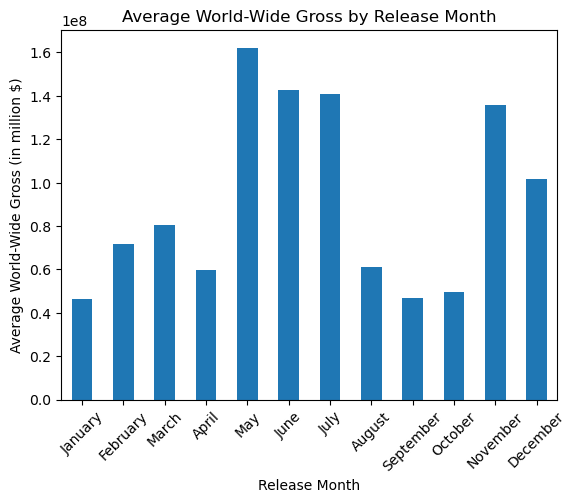

In [101]:
tn_movie_budgets.groupby('release_month')['worldwide_gross'].mean().plot.bar()
plt.title('Average World-Wide Gross by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average World-Wide Gross (in million $)')
plt.xticks(rotation=45)


/var/folders/gf/gqtw2hsd3xx5_9tt2z47xflr0000gn/T/ipykernel_16187/607684797.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tn_movie_budgets_nonzero.groupby('release_month')['domestic_gross'].mean().plot.bar()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

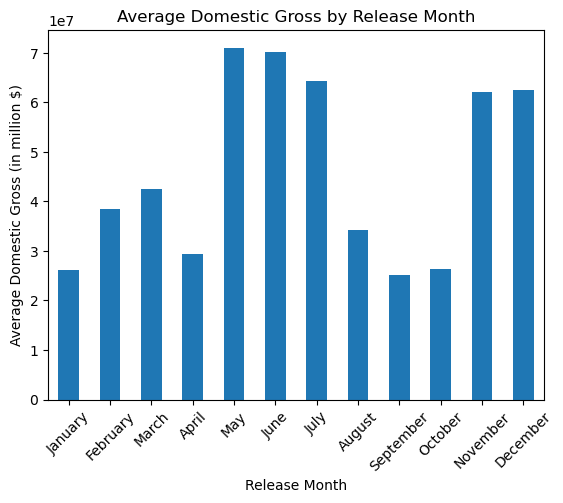

In [129]:
tn_movie_budgets_nonzero = tn_movie_budgets[tn_movie_budgets['domestic_gross'] != 0].copy()
tn_movie_budgets_nonzero.groupby('release_month')['domestic_gross'].mean().plot.bar()
plt.title('Average Domestic Gross by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Domestic Gross (in million $)')
plt.xticks(rotation=45)


In [128]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '').astype(int)


In [112]:
tn_movie_budgets_nonzero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5234 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5234 non-null   int64         
 1   release_date       5234 non-null   datetime64[ns]
 2   movie              5234 non-null   object        
 3   production_budget  5234 non-null   object        
 4   domestic_gross     5234 non-null   int64         
 5   worldwide_gross    5234 non-null   int64         
 6   release_month      5234 non-null   category      
 7   release_year       5234 non-null   int32         
dtypes: category(1), datetime64[ns](1), int32(1), int64(3), object(2)
memory usage: 312.2+ KB


In [139]:
tn_movie_budgets.loc[tn_movie_budgets['movie'] == "Titanic"]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,December,1997


In [133]:
from lin_reg import best_line

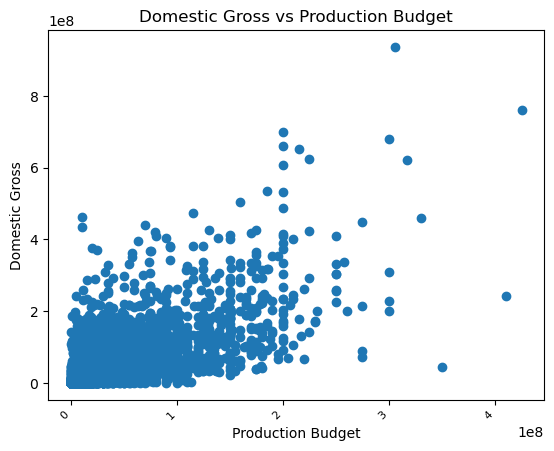

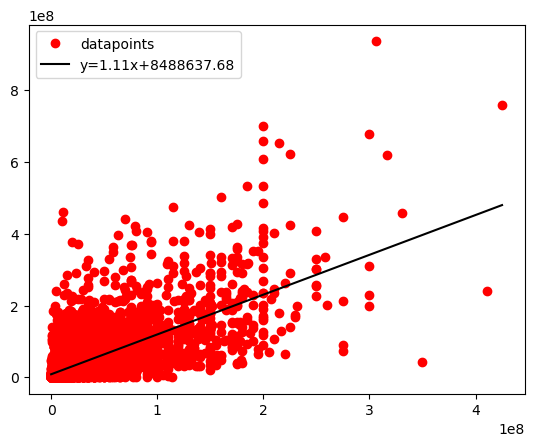

In [134]:
plt.scatter(tn_movie_budgets_nonzero['production_budget'], tn_movie_budgets_nonzero['domestic_gross'])
plt.title('Domestic Gross vs Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.xticks(rotation=45, ha='right', size=8, )
best_line(tn_movie_budgets_nonzero['production_budget'], tn_movie_budgets_nonzero['domestic_gross'])



In [137]:
# How many years of data do we have for the tn_movie_budgets data set?
tn_movie_budgets['release_year'].value_counts().sort_index(ascending=True)

release_year
1915      1
1916      2
1920      1
1925      2
1927      1
       ... 
2016    219
2017    168
2018    143
2019     67
2020      3
Name: count, Length: 96, dtype: int64

In [124]:
tn_movie_budgets_outliers = tn_movie_budgets_nonzero[tn_movie_budgets_nonzero['domestic_gross'] > 400000000]
tn_movie_budgets_outliers.sort_values(by='production_budget', ascending=True)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
3525,26,1982-06-11,ET: The Extra-Terrestrial,"$10,500,000",435110554,792965326,June,1982
3464,65,1977-05-25,Star Wars Ep. IV: A New Hope,"$11,000,000",460998007,786598007,May,1977
303,4,1999-05-19,Star Wars Ep. I: The Phantom Menace,"$115,000,000",474544677,1027044677,May,1999
237,38,2013-11-22,The Hunger Games: Catching Fire,"$130,000,000",424668047,864868047,November,2013
218,19,2002-05-03,Spider-Man,"$139,000,000",403706375,821706375,May,2002
155,56,2013-11-22,Frozen,"$150,000,000",400738009,1272469910,November,2013
154,55,2017-06-02,Wonder Woman,"$150,000,000",412563408,821133378,June,2017
134,35,2017-03-17,Beauty and the Beast,"$160,000,000",504014165,1259199706,March,2017
112,13,2018-06-22,Jurassic World: Fallen Kingdom,"$170,000,000",417719760,1305772799,June,2018
95,96,2019-03-08,Captain Marvel,"$175,000,000",426525952,1123061550,March,2019


([], [])

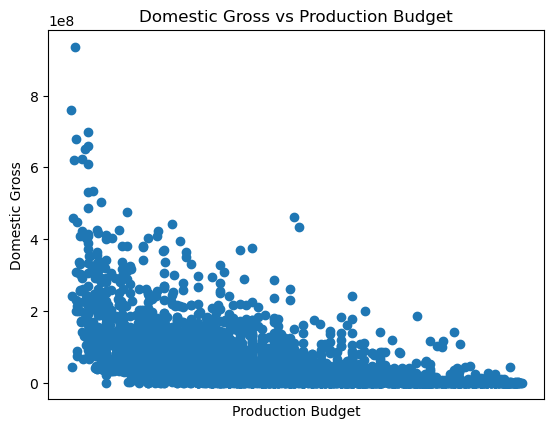

In [119]:
plt.scatter(tn_movie_budgets['production_budget'], tn_movie_budgets['domestic_gross'])
plt.title('Domestic Gross vs Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.xticks(ticks=[], rotation=45, ha='right', size=8, )

In [54]:
tn_movie_budgets.groupby('release_month')['domestic_gross']

# IMDB Data

In [25]:
conn = sqlite3.connect('../data/im.db')
pd.read_sql('SELECT name AS "Table Names" FROM sqlite_master WHERE type="table"', conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [26]:
# Making the IMDB movie_basics table into a pandas df
imdb_movie_basics = pd.read_sql('SELECT * FROM movie_basics', conn)
imdb_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [27]:
# Making the IMDB directors table into a pandas df
imdb_directors = pd.read_sql('SELECT * FROM directors', conn)
imdb_directors.value_counts()
# May want to merge these with the movie and persons tables before converting

movie_id   person_id
tt2249786  nm3911770    52
           nm1286055    52
           nm2853432    52
           nm2747918    52
           nm2583932    52
                        ..
tt1997402  nm0950841     1
tt1997405  nm1016009     1
tt1997417  nm0133980     1
tt1997429  nm4554137     1
tt4105968  nm1297226     1
Name: count, Length: 163535, dtype: int64

In [28]:
imdb_persons = pd.read_sql('SELECT * FROM persons', conn)
imdb_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [151]:
movie_ratings = pd.read_sql("""
SELECT * 
            FROM movie_ratings
            JOIN movie_basics 
            USING(movie_id)
            
            """, conn)

movie_ratings.describe()

,averagerating,numvotes,start_year,runtime_minutes
count,73856.000000,7.385600e+04,73856.000000,66236.000000
mean,6.332729,3.523662e+03,2014.276132,94.654040
std,1.474978,3.029402e+04,2.614807,208.574111
min,1.000000,5.000000e+00,2010.000000,3.000000
25%,5.500000,1.400000e+01,2012.000000,81.000000
50%,6.500000,4.900000e+01,2014.000000,91.000000
75%,7.400000,2.820000e+02,2016.000000,104.000000
max,10.000000,1.841066e+06,2019.000000,51420.000000


In [29]:
# Taking a look at actors and actresses

pd.read_sql("""
SELECT primary_name, COUNT(primary_name) AS num_movies 
FROM principals 
JOIN persons
USING(person_id)
WHERE (category = 'actor' OR category = 'actress') AND characters IS NOT NULL 
GROUP BY person_id
HAVING num_movies > 10
ORDER BY num_movies DESC     
            """, conn) 

,primary_name,num_movies
0,Eric Roberts,143
1,Brahmanandam,69
2,Tom Sizemore,69
3,Seiji Nakamitsu,67
4,Michael Madsen,63
...,...,...
1856,Denzel Washington,11
1857,John Travolta,11
1858,Will Smith,11
1859,Parker Posey,11


# Combining different DataFrames

In [30]:
# Combing the IMDB 'movie_basics' table with the TMDB 'tmdb_movies' table

merged_movie_basics = pd.merge(imdb_movie_basics, tmdb_movies, on='primary_title')
merged_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23612 entries, 0 to 23611
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           23612 non-null  object 
 1   primary_title      23612 non-null  object 
 2   original_title_x   23607 non-null  object 
 3   start_year         23612 non-null  int64  
 4   runtime_minutes    21750 non-null  float64
 5   genres             23263 non-null  object 
 6   Unnamed: 0         23612 non-null  int64  
 7   genre_ids          23612 non-null  object 
 8   id                 23612 non-null  int64  
 9   original_language  23612 non-null  object 
 10  original_title_y   23612 non-null  object 
 11  popularity         23612 non-null  float64
 12  release_date       23612 non-null  object 
 13  vote_average       23612 non-null  float64
 14  vote_count         23612 non-null  int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 2.7+ MB


In [31]:
# Trying to add the bom table to the merged_movie_basics table

# Making the "title" column match "primary title"
bom.rename(columns={'title': 'primary_title'}, inplace=True)

merged_movie_basics = pd.merge(merged_movie_basics, bom, on='primary_title')
merged_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           3772 non-null   object 
 1   primary_title      3772 non-null   object 
 2   original_title_x   3772 non-null   object 
 3   start_year         3772 non-null   int64  
 4   runtime_minutes    3545 non-null   float64
 5   genres             3715 non-null   object 
 6   Unnamed: 0         3772 non-null   int64  
 7   genre_ids          3772 non-null   object 
 8   id                 3772 non-null   int64  
 9   original_language  3772 non-null   object 
 10  original_title_y   3772 non-null   object 
 11  popularity         3772 non-null   float64
 12  release_date       3772 non-null   object 
 13  vote_average       3772 non-null   float64
 14  vote_count         3772 non-null   int64  
 15  studio             3772 non-null   object 
 16  domestic_gross     3738 

<Axes: xlabel='year', ylabel='domestic_gross'>

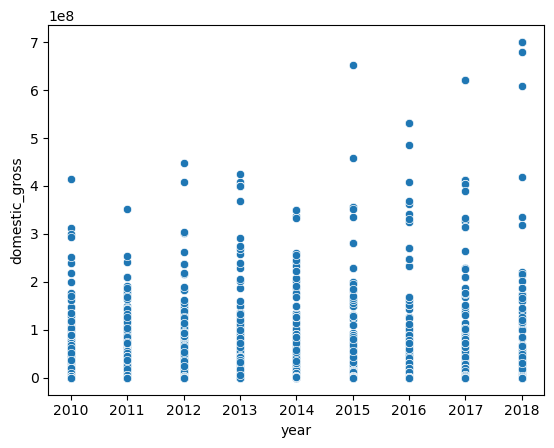

In [34]:
sns.scatterplot(data=merged_movie_basics, x='year', y='domestic_gross')